<a href="https://colab.research.google.com/github/SamuelRoblesArce/UNI_Ingresantes/blob/main/Cuaderno2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar paquetes y subir data

Se subió la data que previamente se había limpiado en el "Cuaderno1", ya que había partes del código que demoraban 1 hora en correr y que convenía exportarlas, para poder trabajar con esa data limpia directamente.

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

# Slicing y Cleansing

In [47]:
df_cep2= pd.read_csv("/content/drive/MyDrive/TrabajoUNI/datac2.csv")
df_cep2

,Unnamed: 0,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI,NO
0,0,0025 san martin de porres,LIMA,ATE,ARQUITECTURA,1,0
1,1,0025 san martin de porres,LIMA,ATE,SIN ESPECIALIDAD,0,2
2,2,0025 san martin de porres,LIMA,ATE,INGENIERÍA MECÁNICA ELÉCTRICA,1,0
3,3,0025 san martin de porres,LIMA,ATE,SIN ESPECIALIDAD,0,1
4,4,0027 san antonio de jicamarca,LIMA,LURIGANCHO,INGENIERÍA QUIMICA,1,0
...,...,...,...,...,...,...,...
10228,10228,von neumann,HUANUCO,HUANUCO,SIN ESPECIALIDAD,0,2
10229,10229,warma kuyay,APURIMAC,ANDAHUAYLAS,SIN ESPECIALIDAD,0,1
10230,10230,iep william shakespeare,LIMA,LIMA,INGENIERÍA DE MINAS,1,0
10231,10231,ángeles de la paz,LIMA,SAN BORJA,SIN ESPECIALIDAD,0,1


In [48]:
import unicodedata

def eliminar_tildes(texto):
  try:
    texto = unicode(texto, 'utf-8')
  except NameError:
    pass

  texto = unicodedata.normalize('NFD', texto)
  texto = texto.encode('ascii', 'ignore')
  texto = texto.decode("utf-8")
  return texto

for columna in df_cep2.columns:
  if df_cep2[columna].dtype == object:  # Solo aplicamos a columnas de tipo string
    df_cep2[columna] = df_cep2[columna].apply(eliminar_tildes)

df_cep2


,Unnamed: 0,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI,NO
0,0,0025 san martin de porres,LIMA,ATE,ARQUITECTURA,1,0
1,1,0025 san martin de porres,LIMA,ATE,SIN ESPECIALIDAD,0,2
2,2,0025 san martin de porres,LIMA,ATE,INGENIERIA MECANICA ELECTRICA,1,0
3,3,0025 san martin de porres,LIMA,ATE,SIN ESPECIALIDAD,0,1
4,4,0027 san antonio de jicamarca,LIMA,LURIGANCHO,INGENIERIA QUIMICA,1,0
...,...,...,...,...,...,...,...
10228,10228,von neumann,HUANUCO,HUANUCO,SIN ESPECIALIDAD,0,2
10229,10229,warma kuyay,APURIMAC,ANDAHUAYLAS,SIN ESPECIALIDAD,0,1
10230,10230,iep william shakespeare,LIMA,LIMA,INGENIERIA DE MINAS,1,0
10231,10231,angeles de la paz,LIMA,SAN BORJA,SIN ESPECIALIDAD,0,1


In [49]:
df_cep2 = df_cep2.groupby(['COLEGIO', 'COLEGIO_DEPA', 'COLEGIO_DIST', 'ESPECIALIDAD'])[['SI', 'NO']].sum().reset_index()
df_cep2

,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI,NO
0,0025 san martin de porres,LIMA,ATE,ARQUITECTURA,1,0
1,0025 san martin de porres,LIMA,ATE,INGENIERIA MECANICA ELECTRICA,1,0
2,0025 san martin de porres,LIMA,ATE,SIN ESPECIALIDAD,0,3
3,0027 san antonio de jicamarca,LIMA,LIMA,SIN ESPECIALIDAD,0,2
4,0027 san antonio de jicamarca,LIMA,LURIGANCHO,INGENIERIA QUIMICA,1,0
...,...,...,...,...,...,...
7917,yamaguchi,LIMA,SANTA ANITA,SIN ESPECIALIDAD,0,1
7918,yamaguchi #129,LIMA,SANTA ANITA,SIN ESPECIALIDAD,0,1
7919,yo soy jesus,LIMA,INDEPENDENCIA,SIN ESPECIALIDAD,0,1
7920,zarate,JUNIN,HUANCAYO,SIN ESPECIALIDAD,0,1


In [50]:
df_admision= pd.read_csv("/content/drive/MyDrive/TrabajoUNI/dataa1.csv")
df_admision

,Unnamed: 0,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI,NO
0,0,STAR,LIMA,SAN JUAN DE LURIGANCHO,ARQUITECTURA,0,1
1,1,STAR,LIMA,SAN JUAN DE LURIGANCHO,FÍSICA,0,3
2,2,STAR,LIMA,SAN JUAN DE LURIGANCHO,INGENIERÍA CIVIL,0,1
3,3,STAR,LIMA,SAN JUAN DE LURIGANCHO,INGENIERÍA DE MINAS,0,1
4,4,0001 MARIA AUXILIADORA,LIMA,LIMA,INGENIERÍA CIVIL,0,1
...,...,...,...,...,...,...,...
16259,16259,ZARATE,JUNIN,HUANCAYO,INGENIERÍA ELÉCTRICA,0,1
16260,16260,ZARATE,JUNIN,HUANCAYO,INGENIERÍA MECATRÓNICA,1,1
16261,16261,ZARATE,JUNÍN,HUANCAYO,INGENIERÍA DE SISTEMAS,0,1
16262,16262,ZARATE,JUNÍN,HUANCAYO,INGENIERÍA ELECTRÓNICA,0,1


In [51]:
df_admision['COLEGIO']=df_admision['COLEGIO'].str.lower()
df_admision

,Unnamed: 0,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI,NO
0,0,star,LIMA,SAN JUAN DE LURIGANCHO,ARQUITECTURA,0,1
1,1,star,LIMA,SAN JUAN DE LURIGANCHO,FÍSICA,0,3
2,2,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERÍA CIVIL,0,1
3,3,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERÍA DE MINAS,0,1
4,4,0001 maria auxiliadora,LIMA,LIMA,INGENIERÍA CIVIL,0,1
...,...,...,...,...,...,...,...
16259,16259,zarate,JUNIN,HUANCAYO,INGENIERÍA ELÉCTRICA,0,1
16260,16260,zarate,JUNIN,HUANCAYO,INGENIERÍA MECATRÓNICA,1,1
16261,16261,zarate,JUNÍN,HUANCAYO,INGENIERÍA DE SISTEMAS,0,1
16262,16262,zarate,JUNÍN,HUANCAYO,INGENIERÍA ELECTRÓNICA,0,1


In [52]:
for columna in df_admision.columns:
  if  df_admision[columna].dtype == object:  # Solo aplicamos a columnas de tipo string
     df_admision[columna] =  df_admision[columna].apply(eliminar_tildes)

df_admision

,Unnamed: 0,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI,NO
0,0,star,LIMA,SAN JUAN DE LURIGANCHO,ARQUITECTURA,0,1
1,1,star,LIMA,SAN JUAN DE LURIGANCHO,FISICA,0,3
2,2,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA CIVIL,0,1
3,3,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA DE MINAS,0,1
4,4,0001 maria auxiliadora,LIMA,LIMA,INGENIERIA CIVIL,0,1
...,...,...,...,...,...,...,...
16259,16259,zarate,JUNIN,HUANCAYO,INGENIERIA ELECTRICA,0,1
16260,16260,zarate,JUNIN,HUANCAYO,INGENIERIA MECATRONICA,1,1
16261,16261,zarate,JUNIN,HUANCAYO,INGENIERIA DE SISTEMAS,0,1
16262,16262,zarate,JUNIN,HUANCAYO,INGENIERIA ELECTRONICA,0,1


In [53]:
df_admision = df_admision.groupby(['COLEGIO', 'COLEGIO_DEPA', 'COLEGIO_DIST', 'ESPECIALIDAD'])[['SI', 'NO']].sum().reset_index()
df_admision

,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI,NO
0,star,LIMA,SAN JUAN DE LURIGANCHO,ARQUITECTURA,0,1
1,star,LIMA,SAN JUAN DE LURIGANCHO,FISICA,0,3
2,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA CIVIL,0,1
3,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA DE MINAS,0,1
4,0001 maria auxiliadora,LIMA,LIMA,INGENIERIA CIVIL,0,1
...,...,...,...,...,...,...
15477,zarate,JUNIN,HUANCAYO,INGENIERIA DE SISTEMAS,0,2
15478,zarate,JUNIN,HUANCAYO,INGENIERIA ELECTRICA,0,1
15479,zarate,JUNIN,HUANCAYO,INGENIERIA ELECTRONICA,0,1
15480,zarate,JUNIN,HUANCAYO,INGENIERIA MECATRONICA,1,1


# Merge de las bases de datos

In [54]:
df_outer_1 = pd.merge(df_admision, df_cep2, on=('COLEGIO','COLEGIO_DEPA','COLEGIO_DIST','ESPECIALIDAD'), how='outer',suffixes=('_admi', '_cepre'))
df_outer_1

,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI_admi,NO_admi,SI_cepre,NO_cepre
0,star,LIMA,SAN JUAN DE LURIGANCHO,ARQUITECTURA,0.0,1.0,NaN,NaN
1,star,LIMA,SAN JUAN DE LURIGANCHO,FISICA,0.0,3.0,NaN,NaN
2,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA CIVIL,0.0,1.0,NaN,NaN
3,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA DE MINAS,0.0,1.0,NaN,NaN
4,0001 maria auxiliadora,LIMA,LIMA,INGENIERIA CIVIL,0.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...
22698,zarate,JUNIN,HUANCAYO,INGENIERIA ELECTRONICA,0.0,1.0,NaN,NaN
22699,zarate,JUNIN,HUANCAYO,INGENIERIA MECATRONICA,1.0,1.0,NaN,NaN
22700,zarate,JUNIN,HUANCAYO,SIN ESPECIALIDAD,NaN,NaN,0.0,1.0
22701,zarumilla,TUMBES,ZARUMILLA,INGENIERIA MECATRONICA,0.0,1.0,NaN,NaN


In [55]:
df_outer_1.fillna(0, inplace=True)
df_outer_1

,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI_admi,NO_admi,SI_cepre,NO_cepre
0,star,LIMA,SAN JUAN DE LURIGANCHO,ARQUITECTURA,0.0,1.0,0.0,0.0
1,star,LIMA,SAN JUAN DE LURIGANCHO,FISICA,0.0,3.0,0.0,0.0
2,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA CIVIL,0.0,1.0,0.0,0.0
3,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA DE MINAS,0.0,1.0,0.0,0.0
4,0001 maria auxiliadora,LIMA,LIMA,INGENIERIA CIVIL,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
22698,zarate,JUNIN,HUANCAYO,INGENIERIA ELECTRONICA,0.0,1.0,0.0,0.0
22699,zarate,JUNIN,HUANCAYO,INGENIERIA MECATRONICA,1.0,1.0,0.0,0.0
22700,zarate,JUNIN,HUANCAYO,SIN ESPECIALIDAD,0.0,0.0,0.0,1.0
22701,zarumilla,TUMBES,ZARUMILLA,INGENIERIA MECATRONICA,0.0,1.0,0.0,0.0


In [56]:
df_inner_1 = pd.merge(df_admision, df_cep2, on=('COLEGIO','COLEGIO_DEPA','COLEGIO_DIST','ESPECIALIDAD'), how='inner',suffixes=('_admi', '_cepre'))
df_inner_1

,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI_admi,NO_admi,SI_cepre,NO_cepre
0,0025 san martin de porres,LIMA,ATE,ARQUITECTURA,1,3,1,0
1,0033 virgilio espinoza barrios,LIMA,LURIGANCHO,INGENIERIA ELECTRONICA,1,1,1,0
2,0050 abraham cardenas ruiz,SAN MARTIN,BELLAVISTA,INGENIERIA CIVIL,1,1,1,0
3,0101 shuji kitamura,LIMA,SANTA ANITA,FISICA,2,2,1,0
4,0101 shuji kitamura,LIMA,SANTA ANITA,INGENIERIA FISICA,1,1,1,0
...,...,...,...,...,...,...,...,...
696,von neumann,HUANUCO,HUANUCO,CIENCIA DE LA COMPUTACION,2,0,1,0
697,von neumann,HUANUCO,HUANUCO,INGENIERIA INDUSTRIAL,1,2,1,0
698,walden school,LIMA,SAN MARTIN DE PORRES,INGENIERIA INDUSTRIAL,1,1,1,0
699,wilhelm von humboldt,LIMA,SAN MARTIN DE PORRES,INGENIERIA INDUSTRIAL,1,1,1,0


# Gráficos

## Top coles con más postulaciones a las especialidades más populares

In [57]:
df_outer_1['total_postu'] = df_outer_1['SI_admi'] + df_outer_1['NO_admi'] + df_outer_1['SI_cepre'] + df_outer_1['NO_cepre']


In [58]:
top_5_especialidades = df_outer_1.groupby('ESPECIALIDAD')['total_postu'].sum().nlargest(5).index.tolist()
top_5_especialidades

['SIN ESPECIALIDAD',
 'INGENIERIA CIVIL',
 'INGENIERIA DE SISTEMAS',
 'ARQUITECTURA',
 'INGENIERIA INDUSTRIAL']

In [59]:
top_5_colegios_por_especialidad = {}
for especialidad in top_5_especialidades:
  df_especialidad = df_outer_1[df_outer_1['ESPECIALIDAD'] == especialidad]
  top_5_colegios = df_especialidad.groupby('COLEGIO')['total_postu'].sum().nlargest(5).index.tolist()
  top_5_colegios_por_especialidad[especialidad] = top_5_colegios

top_5_colegios_por_especialidad

{'SIN ESPECIALIDAD': ['saco olivero',
  'trilce',
  'pamer',
  'technology school',
  'polog'],
 'INGENIERIA CIVIL': ['trilce los olivos',
  'saco oliveros',
  'trilce de roma',
  'trilce los olivos de prolima',
  'saco oliveros helicoidal'],
 'INGENIERIA DE SISTEMAS': ['trilce los olivos',
  'trilce de comas',
  'saco oliveros',
  'saco oliveros helicoidal',
  'trilce marsano'],
 'ARQUITECTURA': ['trilce los olivos',
  'trilce de brena',
  'saco oliveros',
  'trilce los olivos de prolima',
  'colegio mayor secundario presidente del peru'],
 'INGENIERIA INDUSTRIAL': ['trilce los olivos',
  'saco oliveros helicoidal',
  'saco oliveros',
  'juan pablo peregrino',
  'saco oliveros de los olivos']}

In [60]:
top_5_colegios_por_especialidad=pd.DataFrame(top_5_colegios_por_especialidad)

In [61]:
top_5_colegios_por_especialidad

,SIN ESPECIALIDAD,INGENIERIA CIVIL,INGENIERIA DE SISTEMAS,ARQUITECTURA,INGENIERIA INDUSTRIAL
0,saco olivero,trilce los olivos,trilce los olivos,trilce los olivos,trilce los olivos
1,trilce,saco oliveros,trilce de comas,trilce de brena,saco oliveros helicoidal
2,pamer,trilce de roma,saco oliveros,saco oliveros,saco oliveros
3,technology school,trilce los olivos de prolima,saco oliveros helicoidal,trilce los olivos de prolima,juan pablo peregrino
4,polog,saco oliveros helicoidal,trilce marsano,colegio mayor secundario presidente del peru,saco oliveros de los olivos


<ipython-input-62-0fc73b3c271a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_especialidad['Colegio_Completo'] = df_sin_especialidad['COLEGIO'] + ' (' + df_sin_especialidad['COLEGIO_DIST'] + ')'


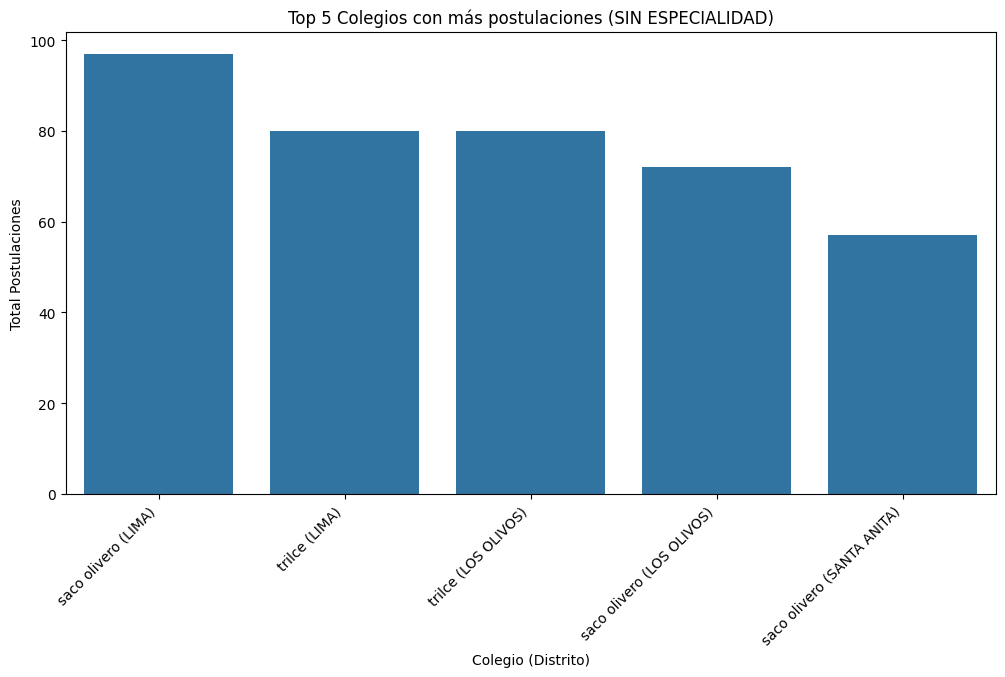

In [62]:
import matplotlib.pyplot as plt

df_sin_especialidad = df_outer_1[df_outer_1['ESPECIALIDAD'] == 'SIN ESPECIALIDAD']
df_sin_especialidad['Colegio_Completo'] = df_sin_especialidad['COLEGIO'] + ' (' + df_sin_especialidad['COLEGIO_DIST'] + ')'
top_5_colegios_sin_especialidad = df_sin_especialidad.groupby('Colegio_Completo')['total_postu'].sum().nlargest(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_colegios_sin_especialidad.index, y=top_5_colegios_sin_especialidad.values)
plt.title('Top 5 Colegios con más postulaciones (SIN ESPECIALIDAD)')
plt.xlabel('Colegio (Distrito)')
plt.ylabel('Total Postulaciones')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-63-7e830911764c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inge_civil['Colegio_Completo'] = df_inge_civil['COLEGIO'] + ' (' + df_inge_civil['COLEGIO_DIST'] + ')'


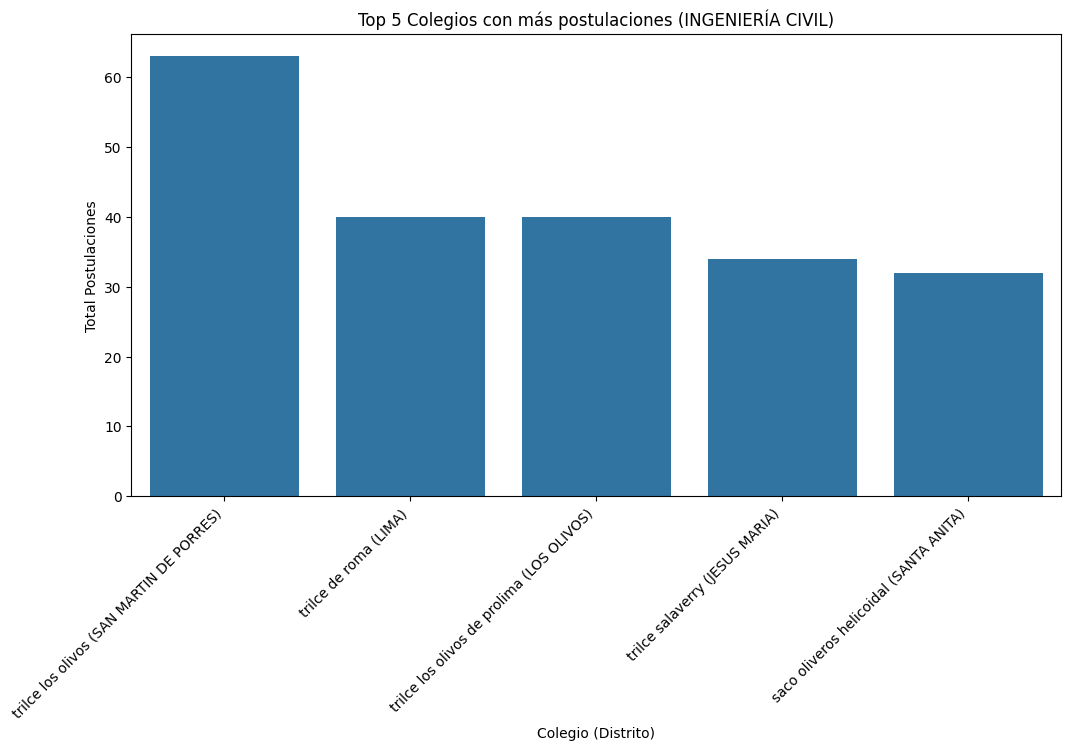

In [63]:
df_inge_civil = df_outer_1[df_outer_1['ESPECIALIDAD'] == 'INGENIERIA CIVIL']
df_inge_civil['Colegio_Completo'] = df_inge_civil['COLEGIO'] + ' (' + df_inge_civil['COLEGIO_DIST'] + ')'
top_5_colegios_inge_civil = df_inge_civil.groupby('Colegio_Completo')['total_postu'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_colegios_inge_civil.index, y=top_5_colegios_inge_civil.values)
plt.title('Top 5 Colegios con más postulaciones (INGENIERÍA CIVIL)')
plt.xlabel('Colegio (Distrito)')
plt.ylabel('Total Postulaciones')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-64-dbb34855e5d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inge_sistemas['Colegio_Completo'] = df_inge_sistemas['COLEGIO'] + ' (' + df_inge_sistemas['COLEGIO_DIST'] + ')'


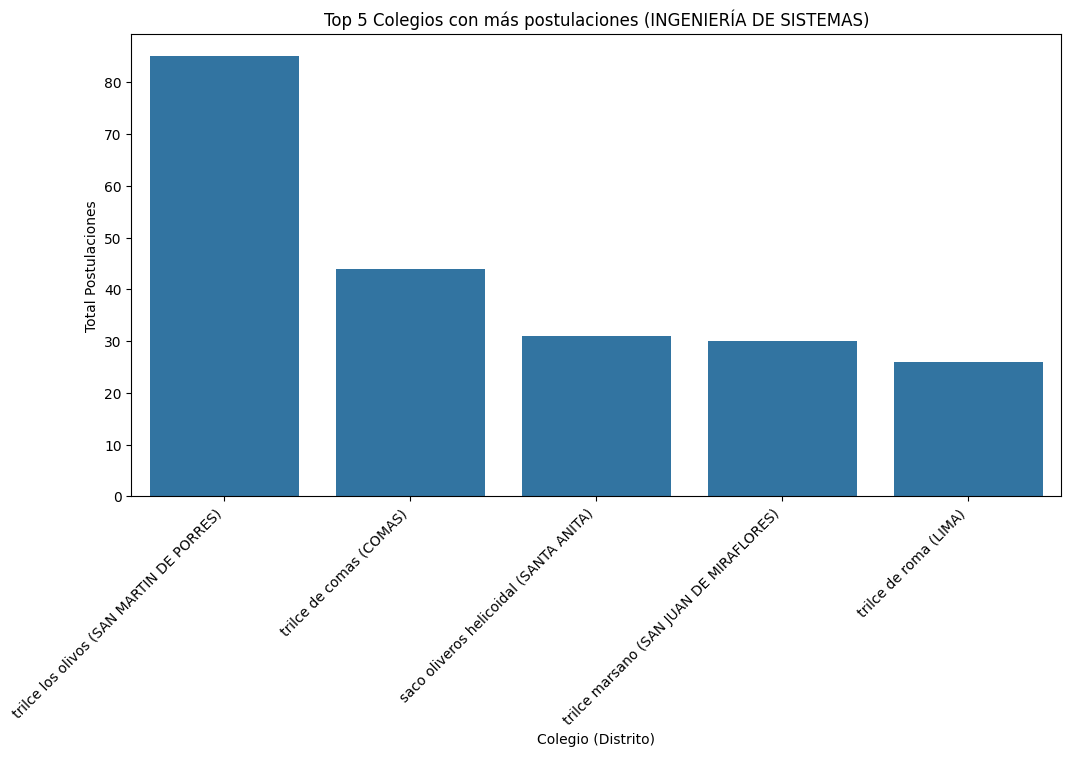

In [64]:
df_inge_sistemas = df_outer_1[df_outer_1['ESPECIALIDAD'] == 'INGENIERIA DE SISTEMAS']
df_inge_sistemas['Colegio_Completo'] = df_inge_sistemas['COLEGIO'] + ' (' + df_inge_sistemas['COLEGIO_DIST'] + ')'
top_5_colegios_inge_sistemas = df_inge_sistemas.groupby('Colegio_Completo')['total_postu'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_colegios_inge_sistemas.index, y=top_5_colegios_inge_sistemas.values)
plt.title('Top 5 Colegios con más postulaciones (INGENIERÍA DE SISTEMAS)')
plt.xlabel('Colegio (Distrito)')
plt.ylabel('Total Postulaciones')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-65-870cd29ff6c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arqui['Colegio_Completo'] = df_arqui['COLEGIO'] + ' (' + df_arqui['COLEGIO_DIST'] + ')'


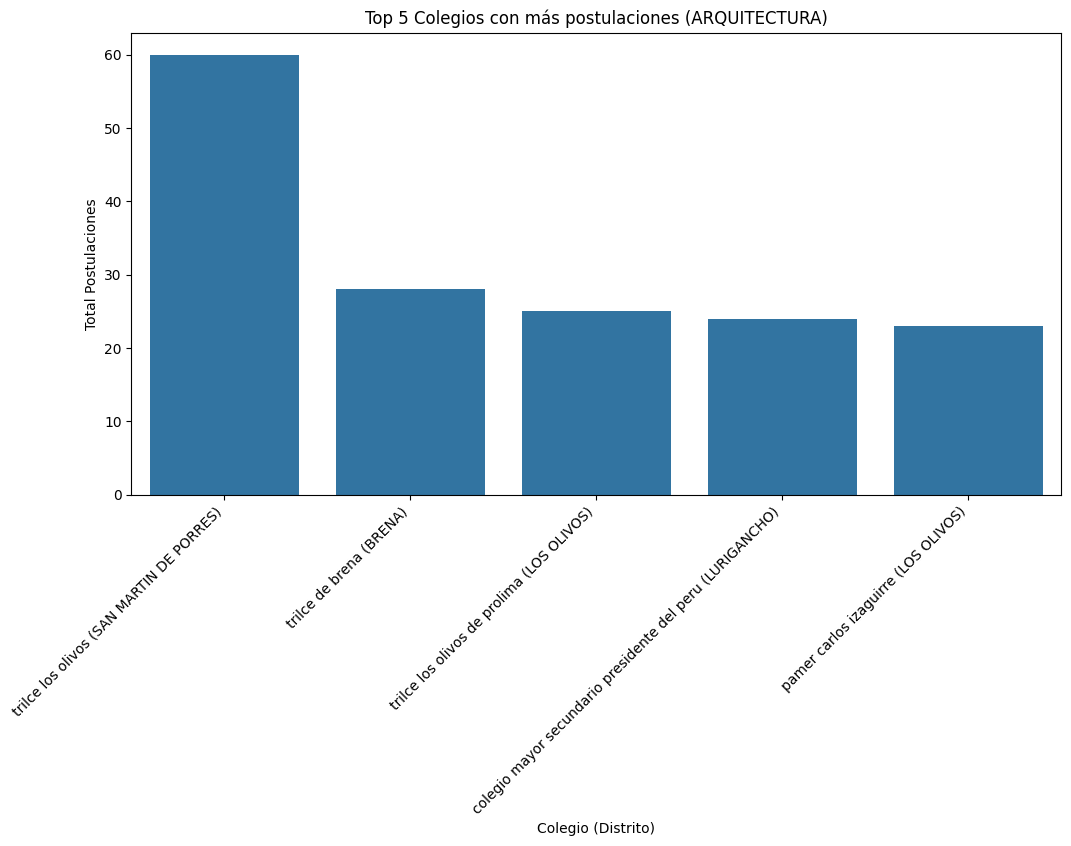

In [65]:
df_arqui = df_outer_1[df_outer_1['ESPECIALIDAD'] == 'ARQUITECTURA']
df_arqui['Colegio_Completo'] = df_arqui['COLEGIO'] + ' (' + df_arqui['COLEGIO_DIST'] + ')'
top_5_colegios_arqui = df_arqui.groupby('Colegio_Completo')['total_postu'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_colegios_arqui.index, y=top_5_colegios_arqui.values)
plt.title('Top 5 Colegios con más postulaciones (ARQUITECTURA)')
plt.xlabel('Colegio (Distrito)')
plt.ylabel('Total Postulaciones')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-66-f40ea182601a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inge_industrial['Colegio_Completo'] = df_inge_industrial['COLEGIO'] + ' (' + df_inge_industrial['COLEGIO_DIST'] + ')'


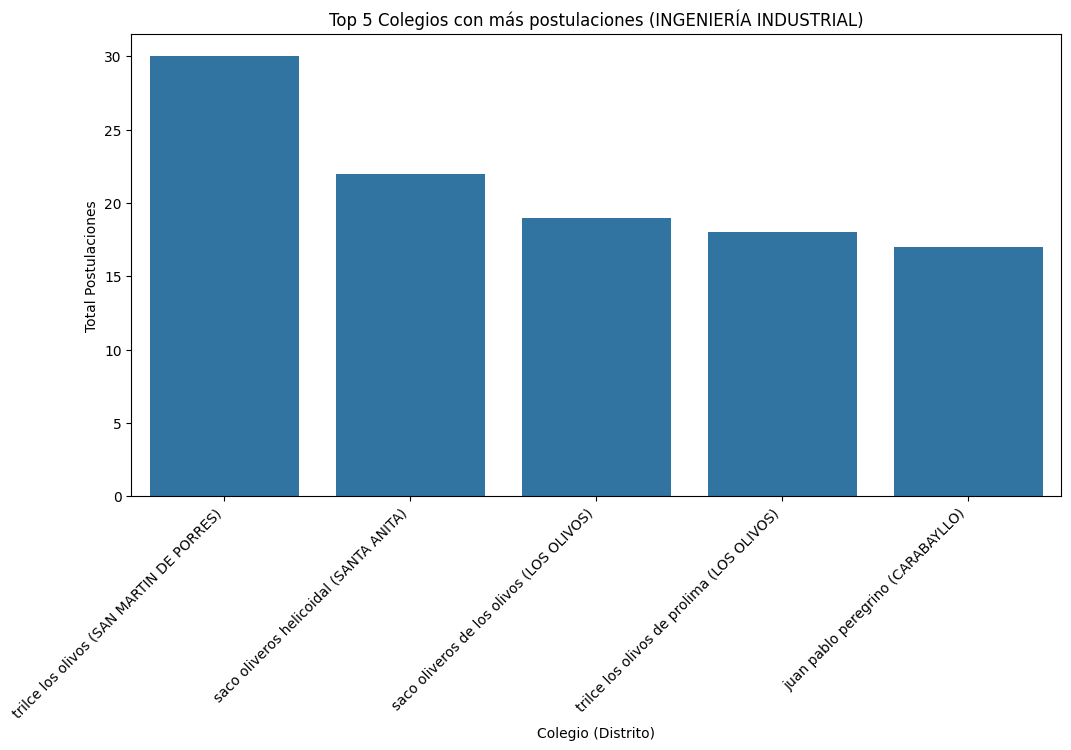

In [66]:
df_inge_industrial = df_outer_1[df_outer_1['ESPECIALIDAD'] == 'INGENIERIA INDUSTRIAL']
df_inge_industrial['Colegio_Completo'] = df_inge_industrial['COLEGIO'] + ' (' + df_inge_industrial['COLEGIO_DIST'] + ')'
top_5_colegios_inge_industrial = df_inge_industrial.groupby('Colegio_Completo')['total_postu'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_colegios_inge_industrial.index, y=top_5_colegios_inge_industrial.values)
plt.title('Top 5 Colegios con más postulaciones (INGENIERÍA INDUSTRIAL)')
plt.xlabel('Colegio (Distrito)')
plt.ylabel('Total Postulaciones')
plt.xticks(rotation=45, ha='right')
plt.show()

## Top coles con más ingresantes a las especialidades más populares

In [67]:
df_outer_1

,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI_admi,NO_admi,SI_cepre,NO_cepre,total_postu
0,star,LIMA,SAN JUAN DE LURIGANCHO,ARQUITECTURA,0.0,1.0,0.0,0.0,1.0
1,star,LIMA,SAN JUAN DE LURIGANCHO,FISICA,0.0,3.0,0.0,0.0,3.0
2,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA CIVIL,0.0,1.0,0.0,0.0,1.0
3,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA DE MINAS,0.0,1.0,0.0,0.0,1.0
4,0001 maria auxiliadora,LIMA,LIMA,INGENIERIA CIVIL,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
22698,zarate,JUNIN,HUANCAYO,INGENIERIA ELECTRONICA,0.0,1.0,0.0,0.0,1.0
22699,zarate,JUNIN,HUANCAYO,INGENIERIA MECATRONICA,1.0,1.0,0.0,0.0,2.0
22700,zarate,JUNIN,HUANCAYO,SIN ESPECIALIDAD,0.0,0.0,0.0,1.0,1.0
22701,zarumilla,TUMBES,ZARUMILLA,INGENIERIA MECATRONICA,0.0,1.0,0.0,0.0,1.0


In [68]:
df_outer_1['total_ingresantes'] = df_outer_1['SI_admi'] + df_outer_1['SI_cepre']

df_outer_1


,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI_admi,NO_admi,SI_cepre,NO_cepre,total_postu,total_ingresantes
0,star,LIMA,SAN JUAN DE LURIGANCHO,ARQUITECTURA,0.0,1.0,0.0,0.0,1.0,0.0
1,star,LIMA,SAN JUAN DE LURIGANCHO,FISICA,0.0,3.0,0.0,0.0,3.0,0.0
2,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA CIVIL,0.0,1.0,0.0,0.0,1.0,0.0
3,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA DE MINAS,0.0,1.0,0.0,0.0,1.0,0.0
4,0001 maria auxiliadora,LIMA,LIMA,INGENIERIA CIVIL,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
22698,zarate,JUNIN,HUANCAYO,INGENIERIA ELECTRONICA,0.0,1.0,0.0,0.0,1.0,0.0
22699,zarate,JUNIN,HUANCAYO,INGENIERIA MECATRONICA,1.0,1.0,0.0,0.0,2.0,1.0
22700,zarate,JUNIN,HUANCAYO,SIN ESPECIALIDAD,0.0,0.0,0.0,1.0,1.0,0.0
22701,zarumilla,TUMBES,ZARUMILLA,INGENIERIA MECATRONICA,0.0,1.0,0.0,0.0,1.0,0.0


<ipython-input-69-94d7ef3f9f8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inge_civil['Colegio_Completo'] = df_inge_civil['COLEGIO'] + ' (' + df_inge_civil['COLEGIO_DIST'] + ')'


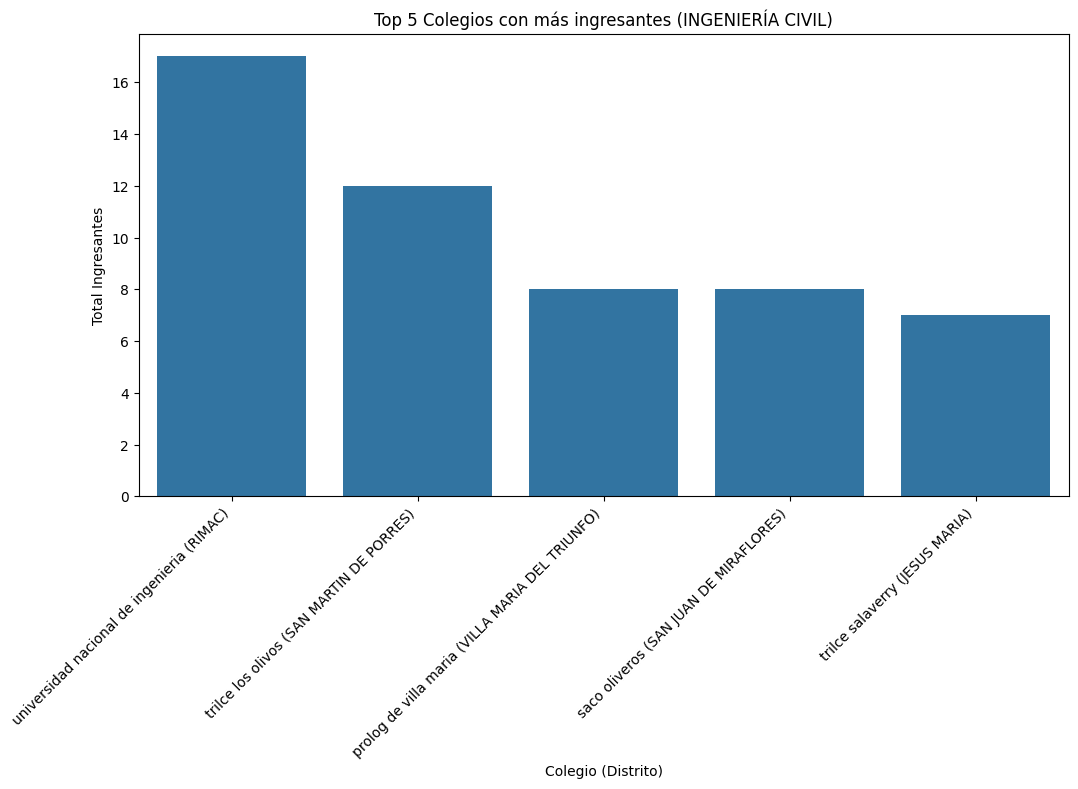

In [69]:
df_inge_civil = df_outer_1[df_outer_1['ESPECIALIDAD'] == 'INGENIERIA CIVIL']
df_inge_civil['Colegio_Completo'] = df_inge_civil['COLEGIO'] + ' (' + df_inge_civil['COLEGIO_DIST'] + ')'
top_5_colegios_inge_civil = df_inge_civil.groupby('Colegio_Completo')['total_ingresantes'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_colegios_inge_civil.index, y=top_5_colegios_inge_civil.values)
plt.title('Top 5 Colegios con más ingresantes (INGENIERÍA CIVIL)')
plt.xlabel('Colegio (Distrito)')
plt.ylabel('Total Ingresantes')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-70-68520e21dd03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inge_sistemas['Colegio_Completo'] = df_inge_sistemas['COLEGIO'] + ' (' + df_inge_sistemas['COLEGIO_DIST'] + ')'


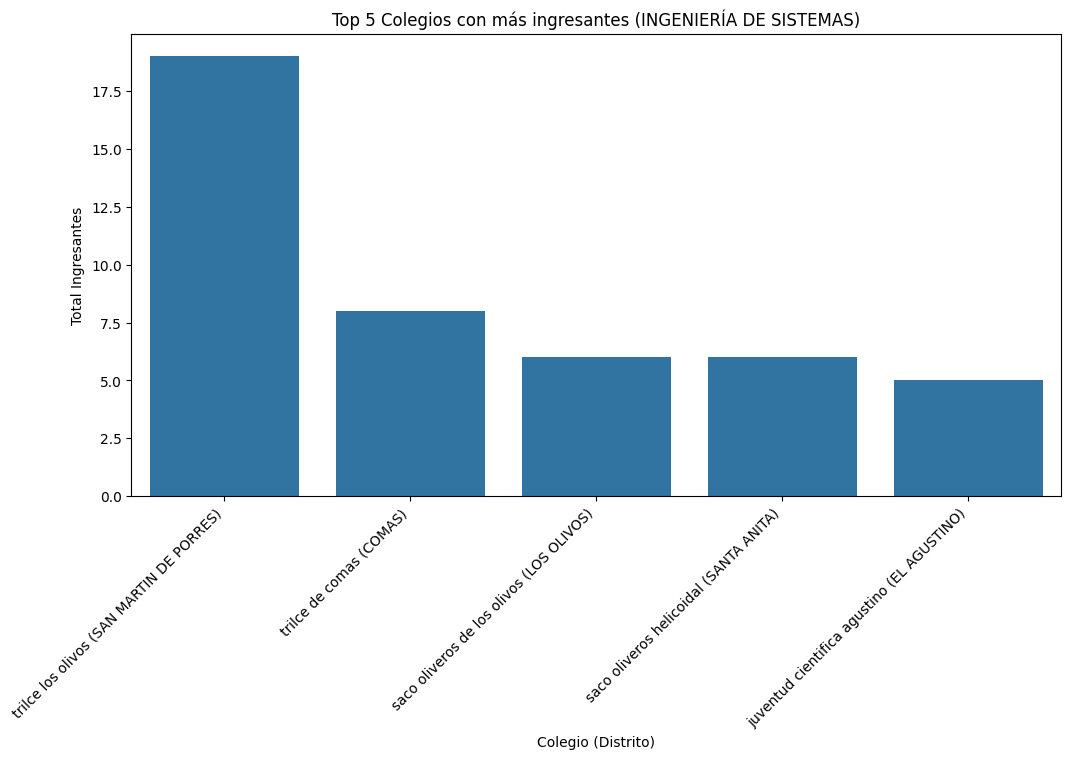

In [70]:
df_inge_sistemas = df_outer_1[df_outer_1['ESPECIALIDAD'] == 'INGENIERIA DE SISTEMAS']
df_inge_sistemas['Colegio_Completo'] = df_inge_sistemas['COLEGIO'] + ' (' + df_inge_sistemas['COLEGIO_DIST'] + ')'
top_5_colegios_inge_sistemas = df_inge_sistemas.groupby('Colegio_Completo')['total_ingresantes'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_colegios_inge_sistemas.index, y=top_5_colegios_inge_sistemas.values)
plt.title('Top 5 Colegios con más ingresantes (INGENIERÍA DE SISTEMAS)')
plt.xlabel('Colegio (Distrito)')
plt.ylabel('Total Ingresantes')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-71-773ec986dd2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arqui['Colegio_Completo'] = df_arqui['COLEGIO'] + ' (' + df_arqui['COLEGIO_DIST'] + ')'


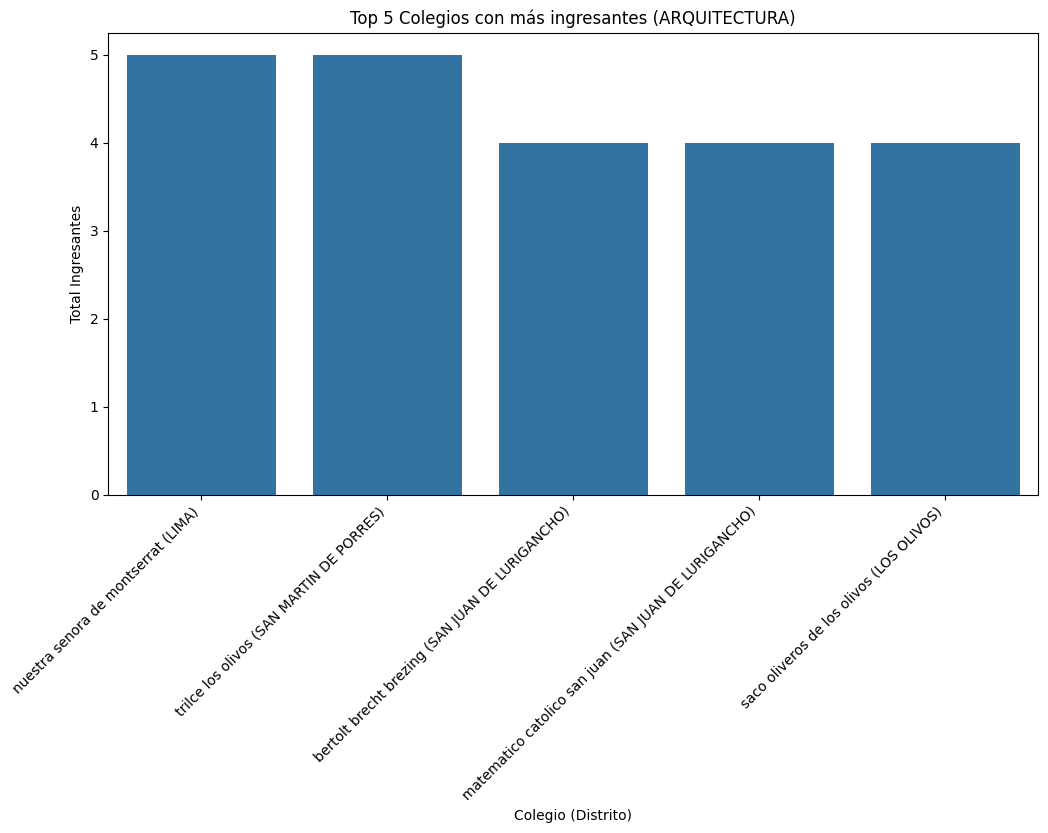

In [71]:
df_arqui = df_outer_1[df_outer_1['ESPECIALIDAD'] == 'ARQUITECTURA']
df_arqui['Colegio_Completo'] = df_arqui['COLEGIO'] + ' (' + df_arqui['COLEGIO_DIST'] + ')'
top_5_colegios_arqui = df_arqui.groupby('Colegio_Completo')['total_ingresantes'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_colegios_arqui.index, y=top_5_colegios_arqui.values)
plt.title('Top 5 Colegios con más ingresantes (ARQUITECTURA)')
plt.xlabel('Colegio (Distrito)')
plt.ylabel('Total Ingresantes')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-72-b4b1f2c259cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inge_industrial['Colegio_Completo'] = df_inge_industrial['COLEGIO'] + ' (' + df_inge_industrial['COLEGIO_DIST'] + ')'


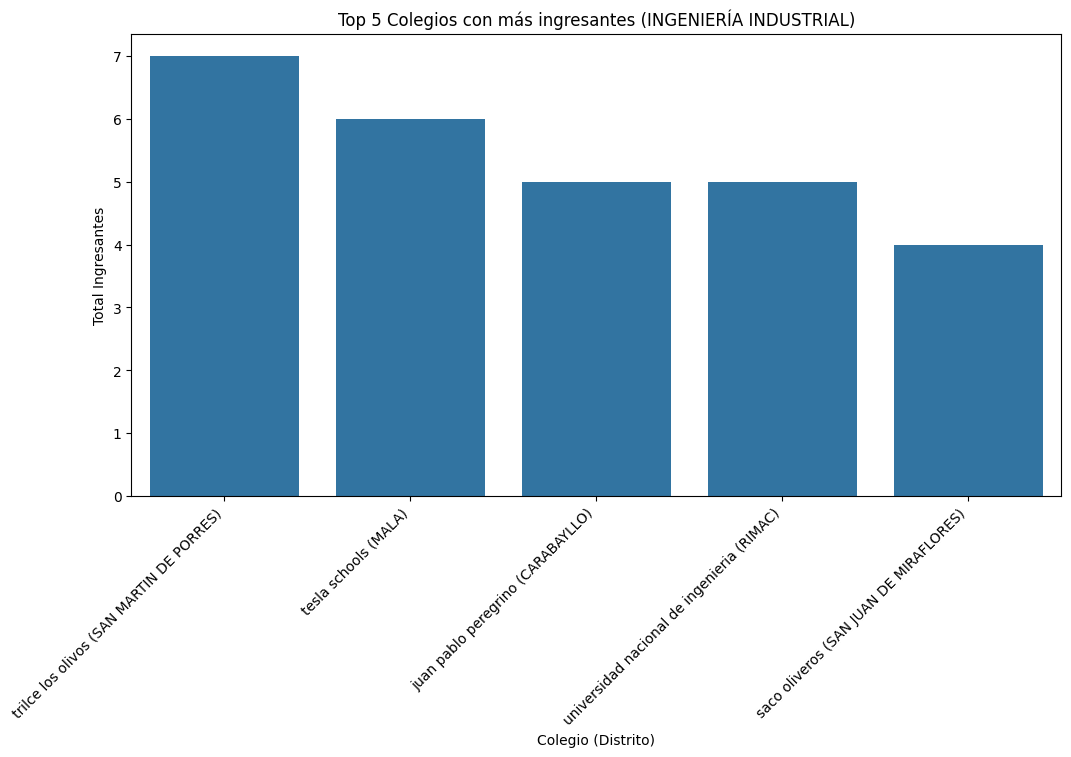

In [72]:
df_inge_industrial = df_outer_1[df_outer_1['ESPECIALIDAD'] == 'INGENIERIA INDUSTRIAL']
df_inge_industrial['Colegio_Completo'] = df_inge_industrial['COLEGIO'] + ' (' + df_inge_industrial['COLEGIO_DIST'] + ')'
top_5_colegios_inge_industrial = df_inge_industrial.groupby('Colegio_Completo')['total_ingresantes'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_colegios_inge_industrial.index, y=top_5_colegios_inge_industrial.values)
plt.title('Top 5 Colegios con más ingresantes (INGENIERÍA INDUSTRIAL)')
plt.xlabel('Colegio (Distrito)')
plt.ylabel('Total Ingresantes')
plt.xticks(rotation=45, ha='right')
plt.show()

## Top distritos y departamentos con más ingresantes

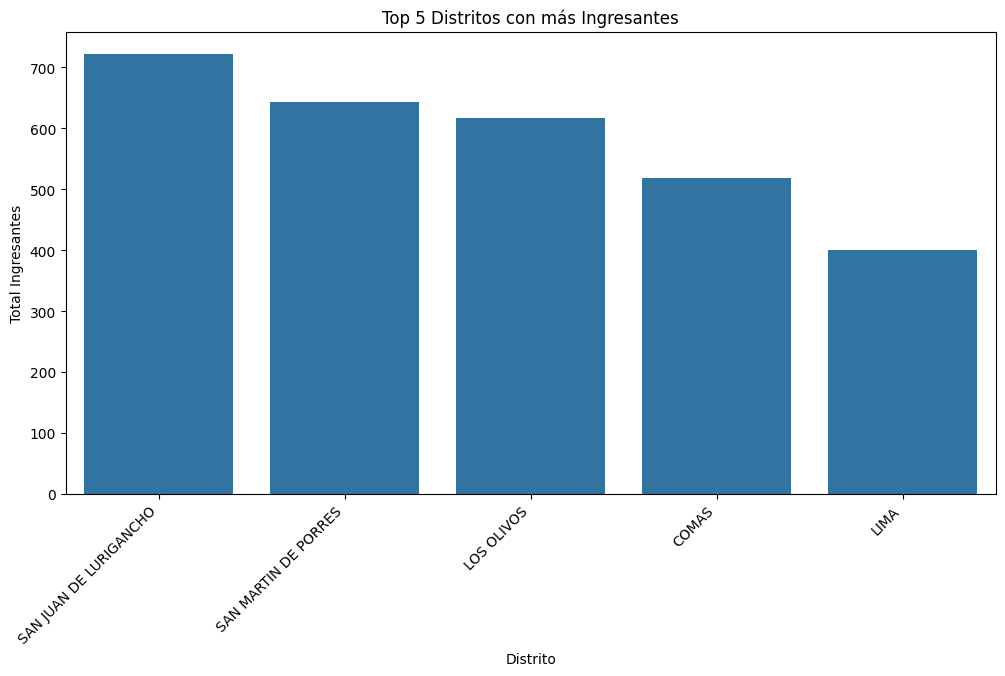

In [73]:
top_5_distritos = df_outer_1.groupby('COLEGIO_DIST')['total_ingresantes'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_distritos.index, y=top_5_distritos.values)
plt.title('Top 5 Distritos con más Ingresantes')
plt.xlabel('Distrito')
plt.ylabel('Total Ingresantes')
plt.xticks(rotation=45, ha='right')
plt.show()

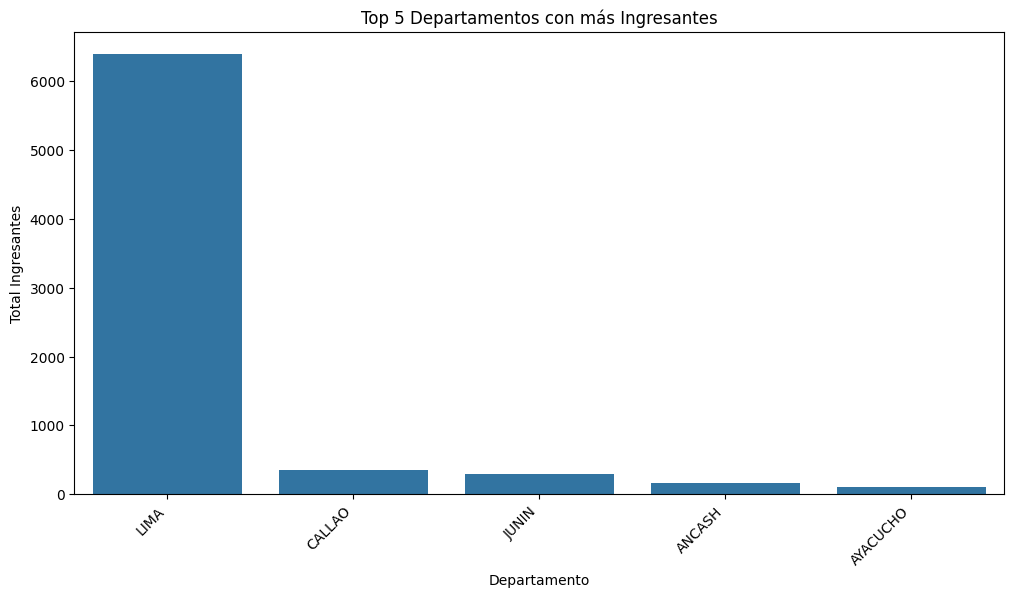

In [74]:
top_5_depas = df_outer_1.groupby('COLEGIO_DEPA')['total_ingresantes'].sum().nlargest(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_depas.index, y=top_5_depas.values)
plt.title('Top 5 Departamentos con más Ingresantes')
plt.xlabel('Departamento')
plt.ylabel('Total Ingresantes')
plt.xticks(rotation=45, ha='right')
plt.show()

## Especialidades más fáciles y díficiles de ingresar


Top 5 especialidades con el ratio más bajo de ingresantes/postulantes:
ESPECIALIDAD
SIN ESPECIALIDAD          0.000000
ARQUITECTURA              0.133975
INGENIERIA DE SISTEMAS    0.158233
INGENIERIA MECATRONICA    0.187908
INGENIERIA CIVIL          0.191767
Name: ratio_ingresantes_postulantes, dtype: float64


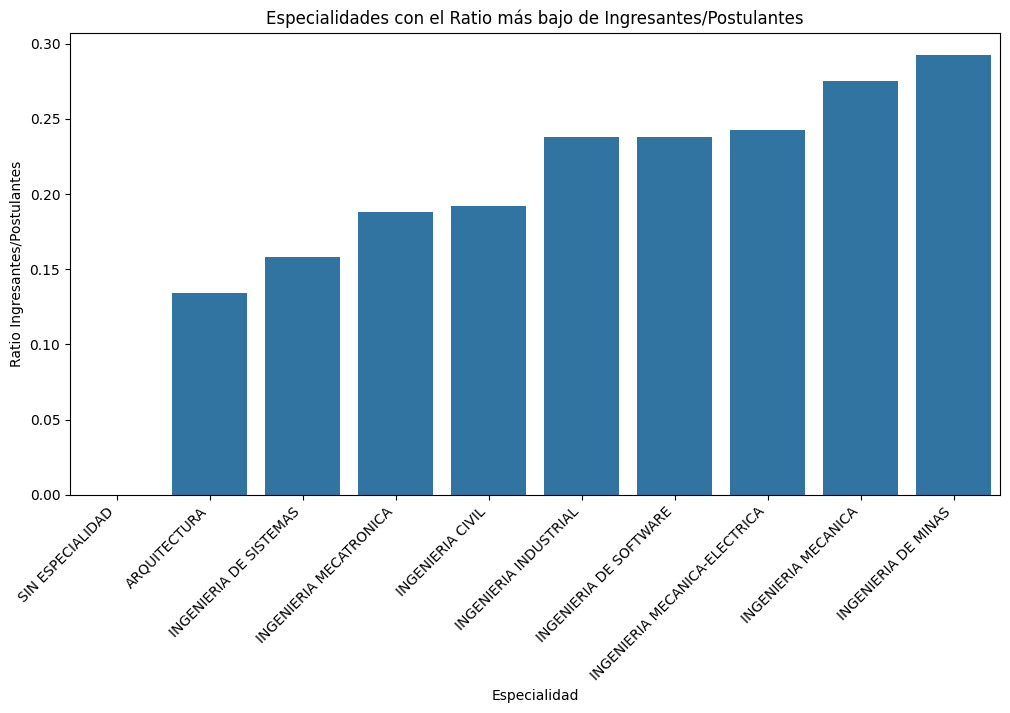

In [75]:
df_outer_1['ratio_ingresantes_postulantes'] = df_outer_1['total_ingresantes'] / df_outer_1['total_postu']
df_ratio_especialidad = df_outer_1.groupby('ESPECIALIDAD')['ratio_ingresantes_postulantes'].mean().sort_values()

# Mostrar las 5 especialidades con el ratio más bajo
print("\nTop 5 especialidades con el ratio más bajo de ingresantes/postulantes:")
print(df_ratio_especialidad.head(5))

# Gráfico de barras para visualizar las especialidades con el ratio más bajo
plt.figure(figsize=(12, 6))
sns.barplot(x=df_ratio_especialidad.head(10).index, y=df_ratio_especialidad.head(10).values)
plt.title('Especialidades con el Ratio más bajo de Ingresantes/Postulantes')
plt.xlabel('Especialidad')
plt.ylabel('Ratio Ingresantes/Postulantes')
plt.xticks(rotation=45, ha='right')
plt.show()



Top 5 especialidades con el ratio más alto de ingresantes/postulantes:
ESPECIALIDAD
INGENIERIA MECANICA ELECTRICA    1.000000
INGENIERIA FISICA                0.576947
INGENIERIA METALURGICA           0.460128
INGENIERIA ESTADISTICA           0.441980
INGENIERIA SANITARIA             0.432243
Name: ratio_ingresantes_postulantes, dtype: float64


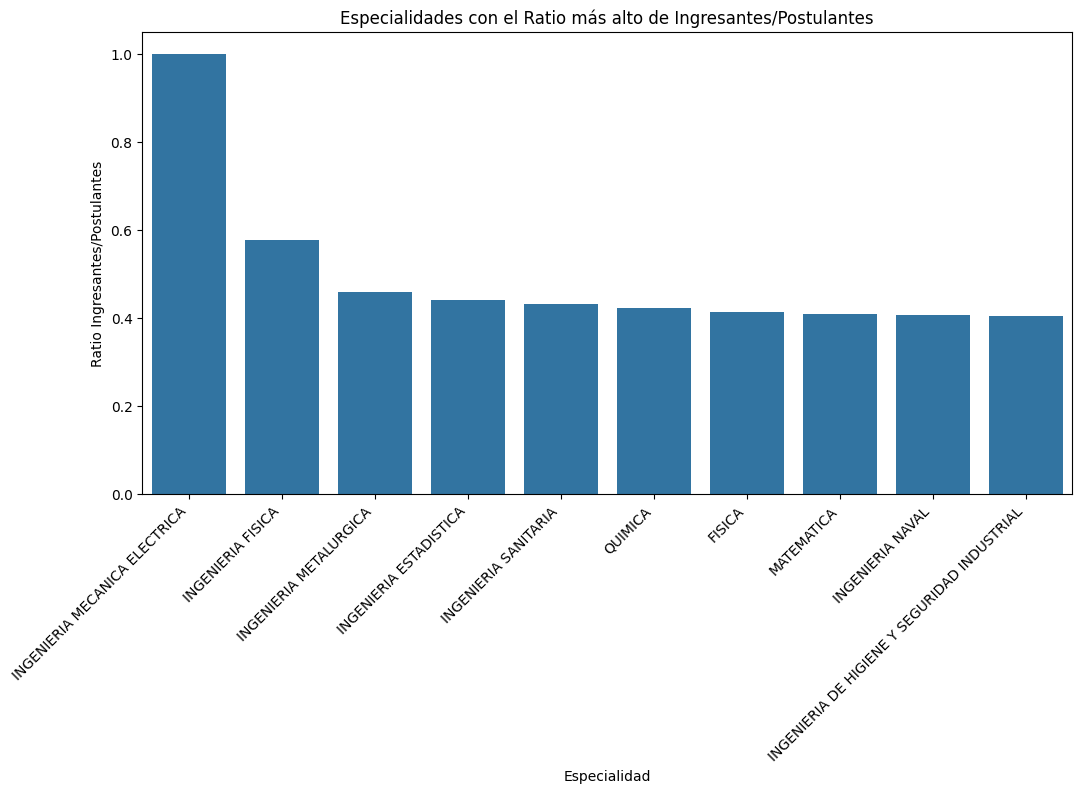

In [76]:
df_ratio_especialidad = df_outer_1.groupby('ESPECIALIDAD')['ratio_ingresantes_postulantes'].mean().sort_values(ascending=False)

# Mostrar las 5 especialidades con el ratio más bajo
print("\nTop 5 especialidades con el ratio más alto de ingresantes/postulantes:")
print(df_ratio_especialidad.head(5))

# Gráfico de barras para visualizar las especialidades con el ratio más bajo
plt.figure(figsize=(12, 6))
sns.barplot(x=df_ratio_especialidad.head(10).index, y=df_ratio_especialidad.head(10).values)
plt.title('Especialidades con el Ratio más alto de Ingresantes/Postulantes')
plt.xlabel('Especialidad')
plt.ylabel('Ratio Ingresantes/Postulantes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [77]:
# prompt: quiero ver todos los registros con especialidad INGENIERIA MECANICA ELECTRICA

df_outer_1[df_outer_1['ESPECIALIDAD'] == 'INGENIERIA MECANICA ELECTRICA']

,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI_admi,NO_admi,SI_cepre,NO_cepre,total_postu,total_ingresantes,ratio_ingresantes_postulantes
30,0025 san martin de porres,LIMA,ATE,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
951,1224 paiso,LIMA,LURIGANCHO,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1745,2091 mariscal andres a. caceres,LIMA,LOS OLIVOS,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2247,3512 maria parado de bellido,APURIMAC,HUANCARAMA,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3104,7053 reino de espana,LIMA,BARRANCO,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21449,trilce - los olivos,LIMA,SAN MARTIN DE PORRES,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
21712,trilce la molina,LIMA,LIMA,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
21792,trilce marsano,LIMA,SAN JUAN DE MIRAFLORES,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
22001,un nuevo patapo,LAMBAYEQUE,PATAPO,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [78]:
df_outer_1[(df_outer_1['ESPECIALIDAD'] == 'INGENIERIA MECANICA ELECTRICA') & (df_outer_1['ratio_ingresantes_postulantes'] == 1)]

,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI_admi,NO_admi,SI_cepre,NO_cepre,total_postu,total_ingresantes,ratio_ingresantes_postulantes
30,0025 san martin de porres,LIMA,ATE,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
951,1224 paiso,LIMA,LURIGANCHO,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1745,2091 mariscal andres a. caceres,LIMA,LOS OLIVOS,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2247,3512 maria parado de bellido,APURIMAC,HUANCARAMA,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3104,7053 reino de espana,LIMA,BARRANCO,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21449,trilce - los olivos,LIMA,SAN MARTIN DE PORRES,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
21712,trilce la molina,LIMA,LIMA,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
21792,trilce marsano,LIMA,SAN JUAN DE MIRAFLORES,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0
22001,un nuevo patapo,LAMBAYEQUE,PATAPO,INGENIERIA MECANICA ELECTRICA,0.0,0.0,1.0,0.0,1.0,1.0,1.0


## Colegios con mejor rendimiento

In [79]:
!pip install plotly.express==0.4.1
import plotly.express as px
import plotly.graph_objects as go

In [81]:
df_outer_1['Colegio_Completo'] = df_outer_1['COLEGIO'] + '_' + df_outer_1['COLEGIO_DEPA'] + '_' + df_outer_1['COLEGIO_DIST']
df_outer_1

,COLEGIO,COLEGIO_DEPA,COLEGIO_DIST,ESPECIALIDAD,SI_admi,NO_admi,SI_cepre,NO_cepre,total_postu,total_ingresantes,ratio_ingresantes_postulantes,Colegio_Completo
0,star,LIMA,SAN JUAN DE LURIGANCHO,ARQUITECTURA,0.0,1.0,0.0,0.0,1.0,0.0,0.0,star_LIMA_SAN JUAN DE LURIGANCHO
1,star,LIMA,SAN JUAN DE LURIGANCHO,FISICA,0.0,3.0,0.0,0.0,3.0,0.0,0.0,star_LIMA_SAN JUAN DE LURIGANCHO
2,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA CIVIL,0.0,1.0,0.0,0.0,1.0,0.0,0.0,star_LIMA_SAN JUAN DE LURIGANCHO
3,star,LIMA,SAN JUAN DE LURIGANCHO,INGENIERIA DE MINAS,0.0,1.0,0.0,0.0,1.0,0.0,0.0,star_LIMA_SAN JUAN DE LURIGANCHO
4,0001 maria auxiliadora,LIMA,LIMA,INGENIERIA CIVIL,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0001 maria auxiliadora_LIMA_LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...
22698,zarate,JUNIN,HUANCAYO,INGENIERIA ELECTRONICA,0.0,1.0,0.0,0.0,1.0,0.0,0.0,zarate_JUNIN_HUANCAYO
22699,zarate,JUNIN,HUANCAYO,INGENIERIA MECATRONICA,1.0,1.0,0.0,0.0,2.0,1.0,0.5,zarate_JUNIN_HUANCAYO
22700,zarate,JUNIN,HUANCAYO,SIN ESPECIALIDAD,0.0,0.0,0.0,1.0,1.0,0.0,0.0,zarate_JUNIN_HUANCAYO
22701,zarumilla,TUMBES,ZARUMILLA,INGENIERIA MECATRONICA,0.0,1.0,0.0,0.0,1.0,0.0,0.0,zarumilla_TUMBES_ZARUMILLA


In [82]:
df_mejores_coles = df_outer_1.groupby('Colegio_Completo')['ratio_ingresantes_postulantes'].mean().sort_values(ascending=False)
df_mejores_coles = df_mejores_coles.to_frame()
# Calcula la suma de ingresantes por colegio directamente
df_mejores_coles['total_ingresantes'] = df_outer_1.groupby('Colegio_Completo')['total_ingresantes'].sum()
df_mejores_coles = df_mejores_coles.reset_index()

fig = px.scatter(df_mejores_coles,
                 x='ratio_ingresantes_postulantes',
                 y='total_ingresantes',
                 size='total_ingresantes',
                 hover_name='Colegio_Completo',
                 title='Ratio de Ingresantes/Postulantes vs Número de Ingresantes por Colegio',
                 labels={'ratio_ingresantes_postulantes': 'Ratio Colegio', 'total_ingresantes': 'Total Ingresantes'})
fig.show()

In [83]:
df_mejores_coles[(df_mejores_coles['ratio_ingresantes_postulantes'] == 1)&(df_mejores_coles['total_ingresantes'] == 1)]

,Colegio_Completo,ratio_ingresantes_postulantes,total_ingresantes
0,i.e.e juan guerrero quimper_LIMA_VILLA MARIA D...,1.0,1.0
1,juan pablo ii_CAJAMARCA_CUTERVO,1.0,1.0
2,ceba - 2022 sinchi roca_LIMA_COMAS,1.0,1.0
3,uniciencia_ICA_ICA,1.0,1.0
4,ceba - 1110 republica de panama_LIMA_LA VICTORIA,1.0,1.0
...,...,...,...
605,horacio patino cruzzati_LIMA_LIMA,1.0,1.0
606,nuestra senora del pilar_LIMA_LIMA,1.0,1.0
608,san andres_LIMA_ATE,1.0,1.0
609,1219 jose carlos mariategui_LIMA_PACHACAMAC,1.0,1.0


In [84]:
fig = px.density_heatmap(df_mejores_coles,
                        x='ratio_ingresantes_postulantes',
                        y='total_ingresantes',
                        title='Densidad de Colegios: Ratio de Ingresantes/Postulantes vs Número de Ingresantes',
                        labels={'ratio_ingresantes_postulantes': 'Ratio Colegio', 'total_ingresantes': 'Total Ingresantes'},
                        nbinsx=50, nbinsy=50) # Puedes ajustar el número de bins para cambiar la granularidad
fig.show()

In [85]:
import plotly.express as px
import plotly.graph_objects as go

# Creamos el heatmap con una escala divergente
fig = px.density_heatmap(df_mejores_coles,
                        x='ratio_ingresantes_postulantes',
                        y='total_ingresantes',
                        title='Densidad de Colegios: Ratio de Ingresantes/Postulantes vs Número de Ingresantes',
                        labels={'ratio_ingresantes_postulantes': 'Ratio Colegio', 'total_ingresantes': 'Total Ingresantes'},
                        nbinsx=50, nbinsy=50,
                        color_continuous_scale='RdBu') # Escala divergente rojo-azul

# Añadimos los puntos del scatter
fig.add_trace(go.Scatter(
    x=df_mejores_coles['ratio_ingresantes_postulantes'],
    y=df_mejores_coles['total_ingresantes'],
    mode='markers',
    marker=dict(
        size=df_mejores_coles['total_ingresantes'],
        opacity=0.5
    ),
    hoverinfo='text',
    hovertext=df_mejores_coles['Colegio_Completo']
))

fig.show()

In [86]:
import plotly.express as px
import plotly.graph_objects as go

# Creamos el heatmap
fig = px.density_heatmap(df_mejores_coles,
                        x='ratio_ingresantes_postulantes',
                        y='total_ingresantes',
                        title='Densidad de Colegios: Ratio de Ingresantes/Postulantes vs Número de Ingresantes',
                        labels={'ratio_ingresantes_postulantes': 'Ratio Colegio', 'total_ingresantes': 'Total Ingresantes'},
                        nbinsx=50, nbinsy=50,
                        color_continuous_scale=[(0, "white"), (0.00000001, "blue"), (1, "red")]
                        )

# Añadimos los puntos del scatter
fig.add_trace(go.Scatter(
    x=df_mejores_coles['ratio_ingresantes_postulantes'],
    y=df_mejores_coles['total_ingresantes'],
    mode='markers',
    marker=dict(
        size=df_mejores_coles['total_ingresantes'],
        opacity=0.5
    ),
    hoverinfo='text',
    hovertext=[f"{row['Colegio_Completo']}<br>Ratio Colegio: {row['ratio_ingresantes_postulantes']}<br>Total Ingresantes: {row['total_ingresantes']}"
               for index, row in df_mejores_coles.iterrows()]
))

fig.show()

# Conclusiones


1. Las especialidades de Ingeniería Civil, Ingeniería de Sistemas, Arquitectura e Ingeniería Industrial son las más populares, con un mayor número de postulantes.

2. Se puede observar que Trilce los olivos es el colegio con más postulantes a las carreras más populares y en todas estas carreras es el único colegio que esta presente en el top 5 colegios con más ingresantes de las 4 especialidades más populares.

3. Distritos como San Martín de Porres, Jesús María, Santiago de Surco y Los Olivos destacan en la cantidad de estudiantes que buscan ingresar a la UNI.

4. A nivel departamental, Lima concentra la mayor cantidad de ingresantes, seguida en menor medida por Junín y Callao.

5. Las especialidades con menor ratio de ingresantes/postulantes (más difíciles) son:

  *   Arquitectura
  *   Ingeniería de Sistemas
  *   Ingeniería Mecatrónica

6. Las especialidades con menor ratio de ingresantes/postulantes (más fáciles) son:

  *   Ingeniería Mecánica Eléctrica
  *   Ingeniería Física
  *   Ingeniería Metalúrgica

7. Hay dos colegios que resaltan en rendimiento:
  *  Trilce los olivos, que es el colegio con mayor cantidad de ingresantes con un ratio de aceptación del 33%.
  * Y el colegio "universidad nacional de ingeniería" de Rimac que tiene un ratio del 98.60% y han ingresado 67 personas.

**Observación:** Habría que comprobar si realmente existe este colegio "universidad nacional de ingeniería" y por qué tiene un ratio tan elevado, o si se coloco como nombre por defecto para postulantes de los que no se sabía el colegio.